** Use case:- When the column is ball shape or has a normal distribution***
<br>
<h3>Formula to find upper/max and lower/min boundries</h3>
-> upper:-  mean + 3*SD(stander deviation)<br>
->lower:- mean - 3*SD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("placement.csv");
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<h3>Before z score graph</h3>

<Axes: xlabel='cgpa'>

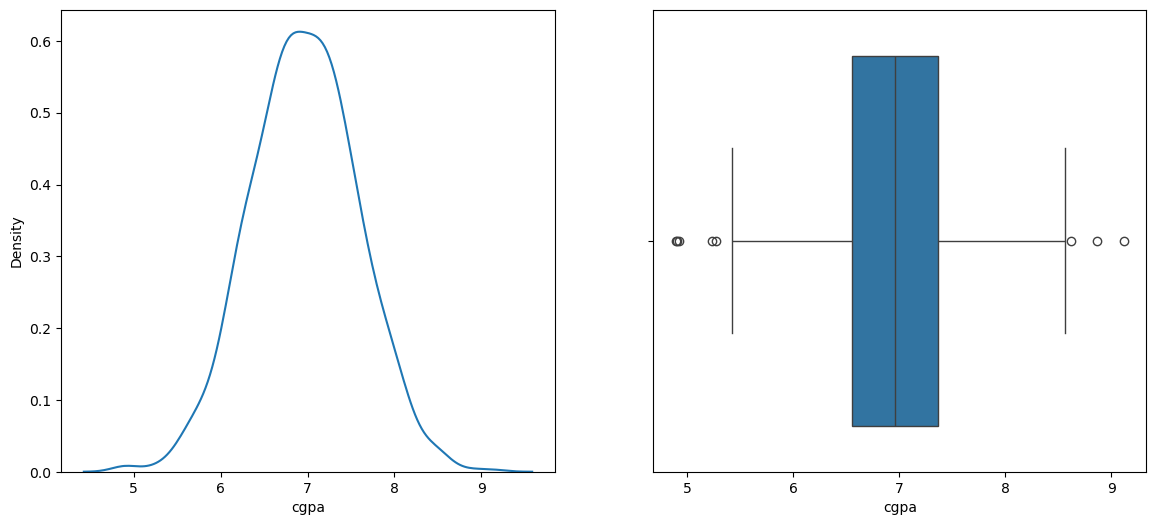

In [14]:
# Here we use cgpa for z-score as it has normal distribution
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["cgpa"],ax=ax1)
sns.boxplot(x=df["cgpa"],ax=ax2)

In [17]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [25]:
upper = 6.96 + (3*0.61)
lower = 6.96 - (3*0.61)
df[(df["cgpa"]<lower) | (df["cgpa"]>upper)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


<h3>Trimming method</h3>

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.79                  44.0       1
996  8.79                  65.0       1
997  5.13                  34.0       0
998  8.62                  46.0       1
999  5.13                  10.0       1

[1000 rows x 3 columns]


<Axes: xlabel='cgpa'>

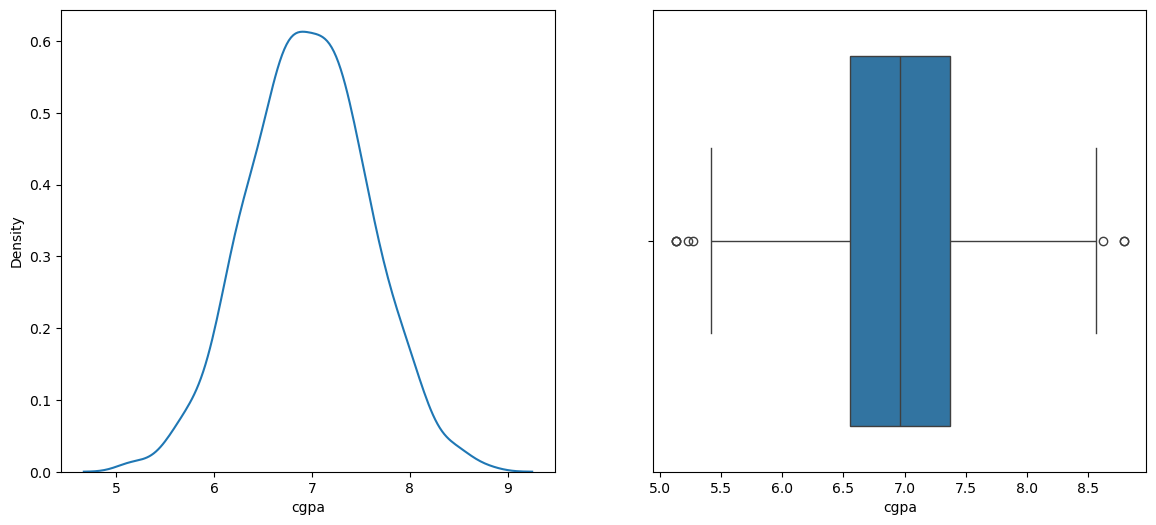

In [38]:
new_df = df[(df["cgpa"]>=lower) & (df["cgpa"]<=upper)]
print(new_df)
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(new_df["cgpa"],ax=ax1)
sns.boxplot(x=new_df["cgpa"],ax=ax2)

<h3>capping method</h3>

In [36]:
df["cgpa"]=np.where(
    df["cgpa"]<lower,
    lower,
    np.where(
        df["cgpa"]>upper,
        upper,
        df["cgpa"]
    )
)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.79,44.0,1
996,8.79,65.0,1
997,5.13,34.0,0
998,8.62,46.0,1


<Axes: xlabel='cgpa'>

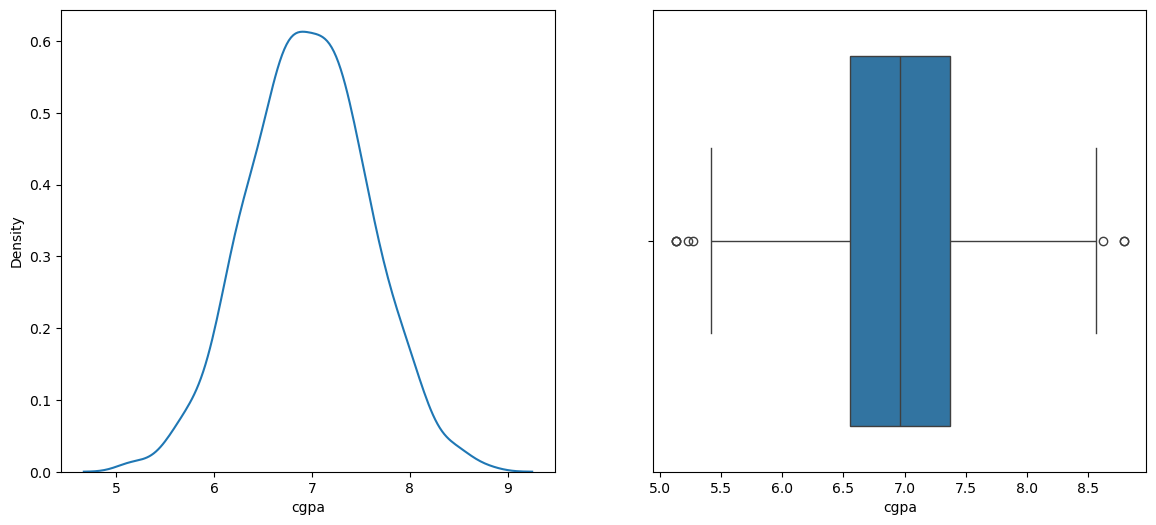

In [39]:
fig , [ax1,ax2] = plt.subplots(ncols=2,figsize=(14,6))
sns.kdeplot(df["cgpa"],ax=ax1)
sns.boxplot(x=df["cgpa"],ax=ax2)